In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv('parking_citations_unc.csv')
# df_corrupt = pd.read_csv('parking_citations_cor.csv')
df

,Unnamed: 0,Ticket number,Issue time,Marked Time,Plate Expiry Date,VIN,Agency,Fine amount,Latitude,Longitude,...,Violation Description_SAFETY ZONE/CURB,Violation Description_STANDNG IN ALLEY,Violation Description_STNDNG IN ALLEY,Violation Description_STOP/STAND PROHIBIT,Violation Description_TIME LIMIT/CITY LOT,Violation Description_WHITE CURB,Violation Description_WHITE ZONE,Violation Description_WITHIN INTERSECTION,Violation Description_YELLOW ZONE,Make
0,4,1105461453,115.0,0.0,200316.0,0.0,1.0,93.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,CHEV
1,6,1106500452,1710.0,0.0,201605.0,0.0,1.0,163.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,MAZD
2,10,1106506424,1100.0,0.0,201511.0,0.0,1.0,93.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,FORD
3,11,1106506435,1105.0,0.0,201701.0,0.0,1.0,93.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,CHRY
4,14,1107179581,1055.0,0.0,201605.0,0.0,54.0,68.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,TOYO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,9983,4273385152,839.0,0.0,8.0,0.0,53.0,73.0,6383992.0,1904627.7,...,0,0,0,0,0,0,0,0,0,FORD
4975,9984,4273385163,840.0,0.0,11.0,0.0,53.0,73.0,6383992.0,1904627.7,...,0,0,0,0,0,0,0,0,0,DODG
4976,9990,4273385222,854.0,0.0,5.0,0.0,53.0,73.0,6385584.6,1904620.6,...,0,0,0,0,0,0,0,0,0,TOYT
4977,9995,4273385270,1117.0,0.0,9.0,0.0,53.0,73.0,99999.0,99999.0,...,0,0,0,0,0,0,0,0,0,TOYT


---

#### Define target variable

In [3]:
top_25 = df['Make'].value_counts().index[:25]
df['top_25'] = np.where(df['Make'].isin(top_25),1,0)
# df[df['top_25']==1]

---

#### Check class balance

(array([ 395., 4584.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

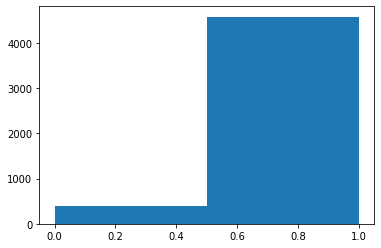

In [4]:
plt.hist(df['top_25'], bins=2)

---

#### We want training and test set to have similar ratio of classes

In [5]:
diff = 1
while diff>0.001:
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Make','top_25']), df['top_25'], test_size=0.3)
    train_ratio = len(np.where(y_train==0)[0])/len(X_train)
    test_ratio = len(np.where(y_test==0)[0])/len(X_test)
    diff = abs(train_ratio - test_ratio)
print(train_ratio)
print(test_ratio)

0.07919655667144906
0.07965194109772424


---

#### Fit Logistic Regression model

In [6]:
lr = LogisticRegression(penalty='l1',
                        solver='liblinear',
                        max_iter=200,
                        class_weight={0:1-train_ratio, 1:train_ratio})
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0,
                   class_weight={0: 0.9208034433285509, 1: 0.07919655667144906},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

#### Precision is not great for minority class: 
Not very many predictions matched the actual class
#### Recall is decent for minority class:
about half of "not-top-25" cars were classified correctly

In [7]:
print(classification_report(y_test, lr.predict(X_test), labels=[0,1], target_names=['not_top25','top25']))

              precision    recall  f1-score   support

   not_top25       0.13      0.40      0.20       119
       top25       0.94      0.78      0.85      1375

    accuracy                           0.75      1494
   macro avg       0.54      0.59      0.53      1494
weighted avg       0.87      0.75      0.80      1494

